In [1]:
# conda base 

# Data manipulation 
import pandas as pd 
import numpy as np

# Data viz
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# ml
from sklearn.cluster import KMeans

This notebook shows the patters in seq space when we mapp differentes propertiers

# load data and plot functions

In [2]:
# load seqs annots
df_annot = pd.read_csv("../results/tables/df_annot_all.csv", sep = "\t")

# load likelihoods from carp and merge dset
df_plm = pd.read_pickle("../results/embeddings/all_plm.pkl")

# rename onehot col
df_plm = df_plm.rename(columns={"onehot": "aa_composition"})

# merge data
df_annot_plm = pd.merge(df_annot, df_plm, on = "seq_id")

# load tsne coords and merge annots
df_sbl = pd.read_csv("../results/dim_redo/splitted_classes/tsne/tsne_2d_plm_sbl_esm1b.csv")
df_sbl = df_sbl.merge(df_annot_plm, on = "seq_id")
df_mbl = pd.read_csv("../results/dim_redo/splitted_classes/tsne/tsne_2d_plm_mbl_esm1b.csv")
df_mbl = df_mbl.merge(df_annot_plm, on = "seq_id")

# per class datasets 
df_sbl_a = df_sbl[df_sbl.bla_class == "Class A"]
df_sbl_c = df_sbl[df_sbl.bla_class == "Class C"]
df_sbl_d = df_sbl[df_sbl.bla_class == "Class D"]

In [3]:
def do_iscatter(df, annot):
    
    """
    do a scatterplot given a df and hue
    """

    # plot
    fig = px.scatter(
    df, x = 'tSNE1_esm1b', y = 'tSNE2_esm1b',
    height = 400, width = 500, color = annot,
    hover_name = "protein_name", 
    color_discrete_sequence = px.colors.qualitative.Plotly,
    hover_data = [
        "#name", "protein_family_header", 'bla_class'])

    fig.update_traces(marker=dict(size=8, line=dict(width=1,color='black')),selector=dict(mode='markers'))
    fig.update_layout(template="plotly_white")
    #fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey',mirror=True)
    #fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey', mirror=True)
    fig.update_yaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.update_xaxes(showline=True, linewidth=1, linecolor='LightGrey')
    fig.show()

In [4]:
# load data 
rand100_concat = pd.read_pickle("../results/distance/rand600seqs.pkl")

# split by superfam
rand100_sbl = rand100_concat[~rand100_concat.bla_class.str.contains("Class B")]
rand100_mbl = rand100_concat[rand100_concat.bla_subclass.str.contains("Class B1|Class B2|Class B3")]

# split data by class
rand100_a = rand100_sbl[rand100_sbl.bla_class == "Class A"]
rand100_c = rand100_sbl[rand100_sbl.bla_class == "Class C"]
rand100_d = rand100_sbl[rand100_sbl.bla_class == "Class D"]

rand100_b1 = rand100_mbl[rand100_mbl.bla_subclass == "Class B1"]
rand100_b2 = rand100_mbl[rand100_mbl.bla_subclass == "Class B2"]
rand100_b3 = rand100_mbl[rand100_mbl.bla_subclass == "Class B3"]

# kmeans

In [5]:
def do_kmeans(df, model, k):
    
    # take the embeddings from a plm
    df = df.copy()
    embeddings = df[model].to_list()
    
    # set opts and run kmeans
    kmeans = KMeans(n_clusters = k, random_state = 42) 
    kmeans.fit_transform(embeddings)
    
    # extract the kmeans labels and add it to the df
    df.loc[:, "kmeans"] = kmeans.labels_
    # sampled_knn = pd.merge(rand100_concat[["seq_id", "kmeans"]], df_coords, on = "seq_id", how = "left")
    
    # plot
    plt.figure(figsize=(5,5))
    sns.scatterplot(data = df, x = 'tSNE1_esm1b', y = 'tSNE2_esm1b', edgecolor = "black", 
                    hue="kmeans", style="bla_subclass",  palette = "tab10", s = 150, alpha=0.2)
    plt.title(model)
    plt.legend(bbox_to_anchor=(1.001, 1.02), loc="upper left")
    plt.show()

## esm1b


############  SBL ############



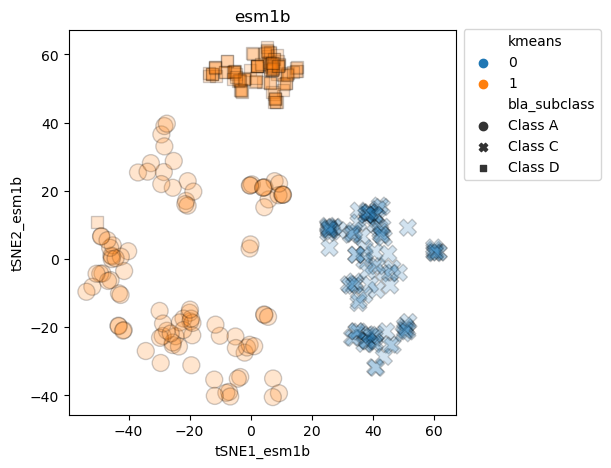

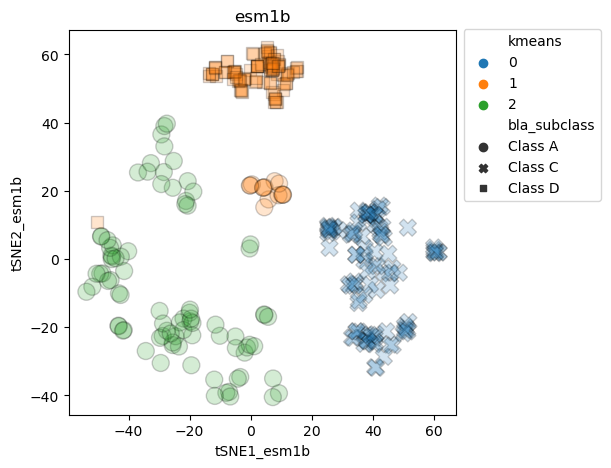


############  MBL ############



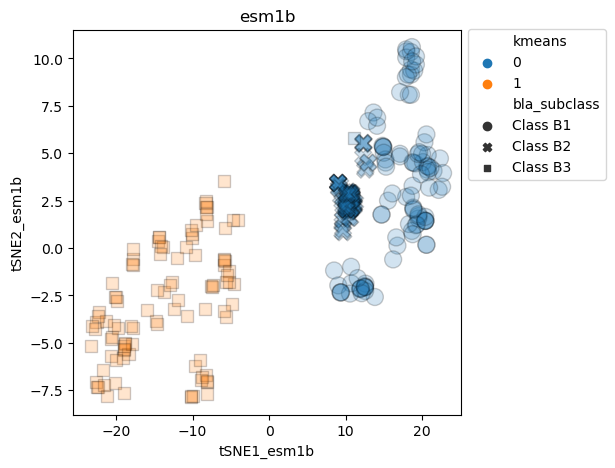

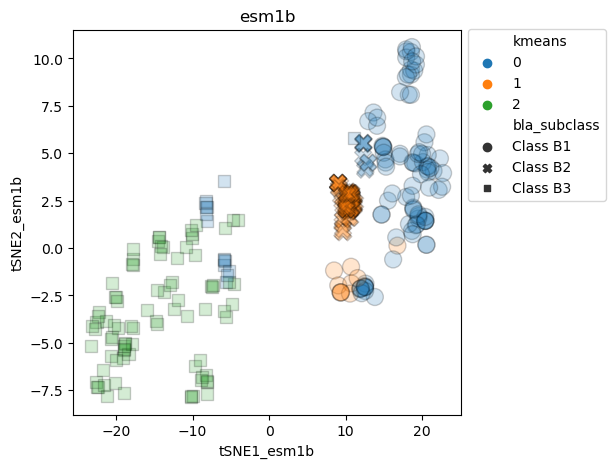


############  Class A ############



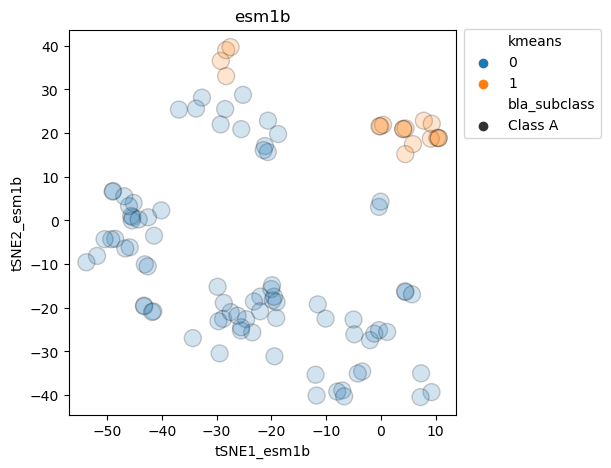

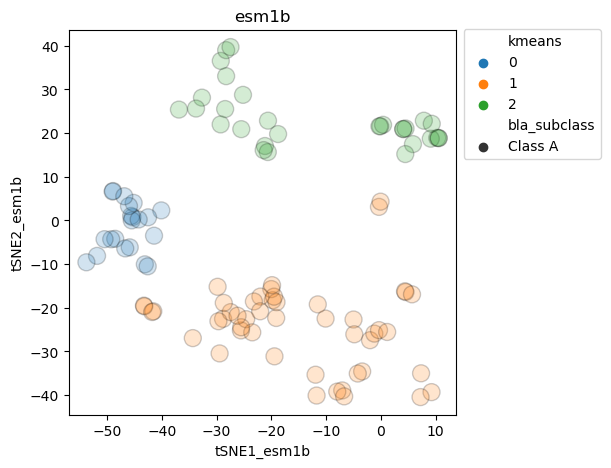

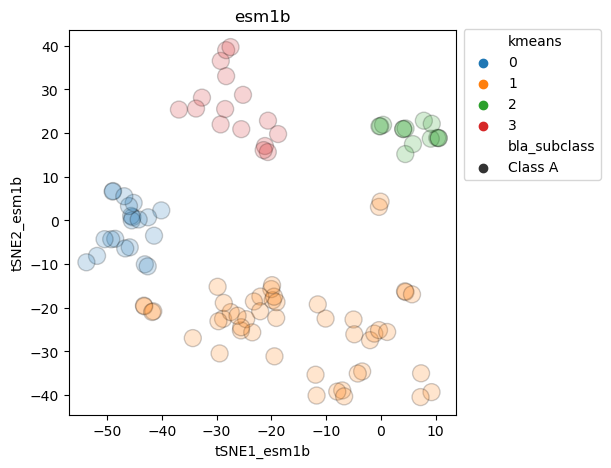

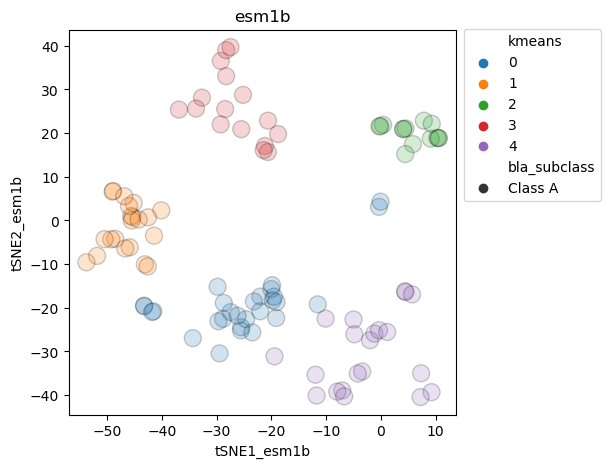

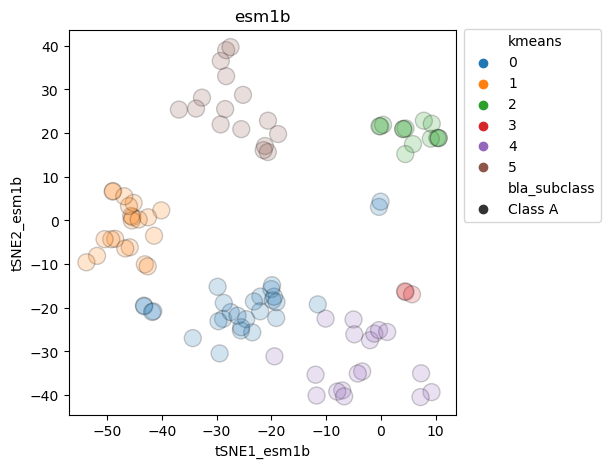

In [6]:
print("\n############  SBL ############\n")
for n in [2, 3]:
    do_kmeans(rand100_sbl, "esm1b", n)

print("\n############  MBL ############\n")    
for n in [2, 3]:
    do_kmeans(rand100_mbl, "esm1b", n)

print("\n############  Class A ############\n")
for n in [2, 3, 4, 5, 6]:
    do_kmeans(rand100_a, "esm1b", n)

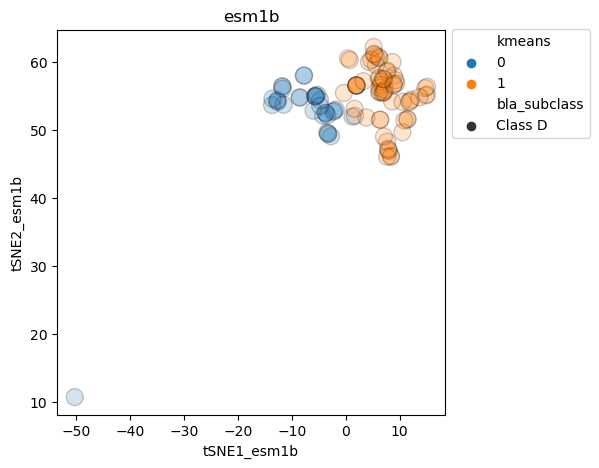

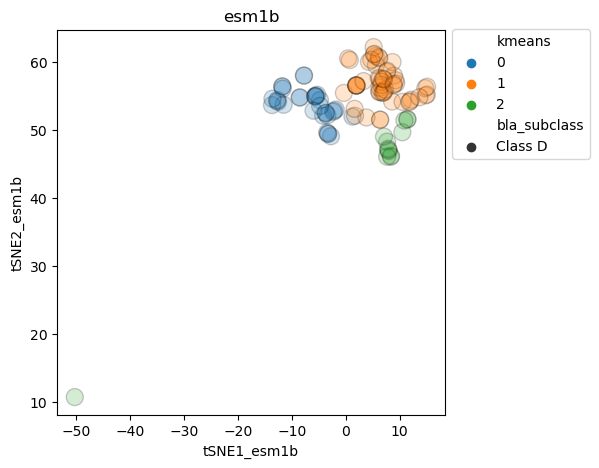

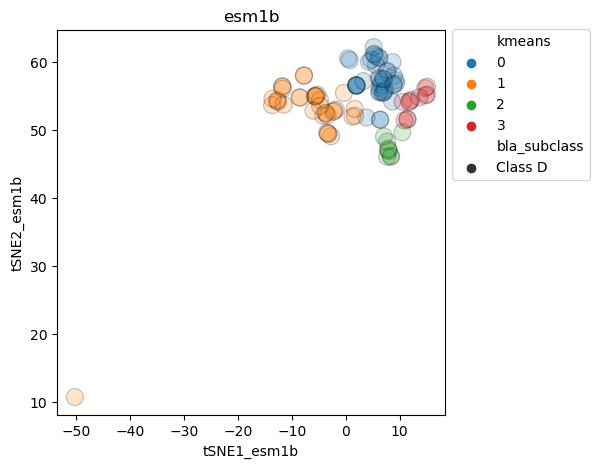

In [9]:
for n in [2, 3, 4]:
    do_kmeans(rand100_d, "esm1b", n)

## esm

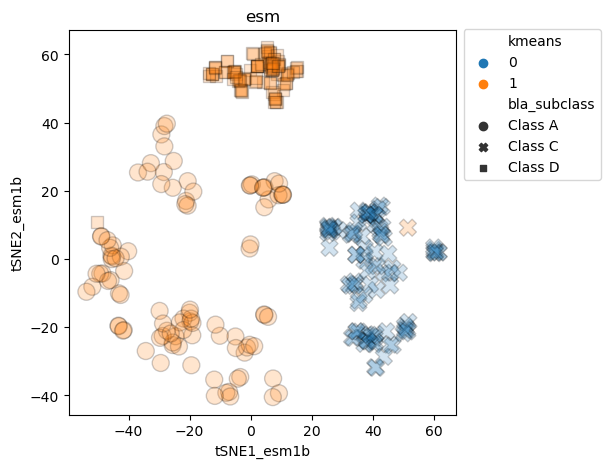

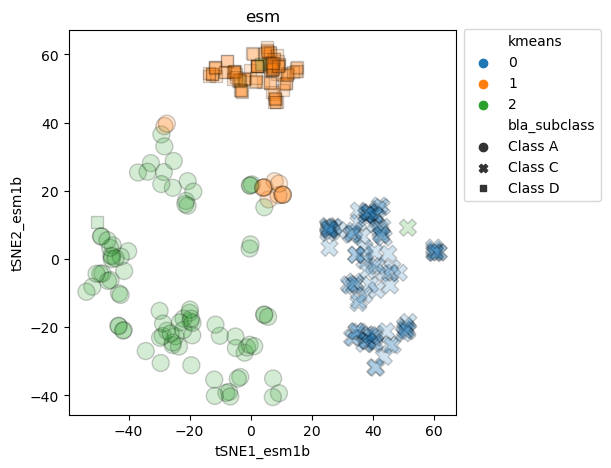

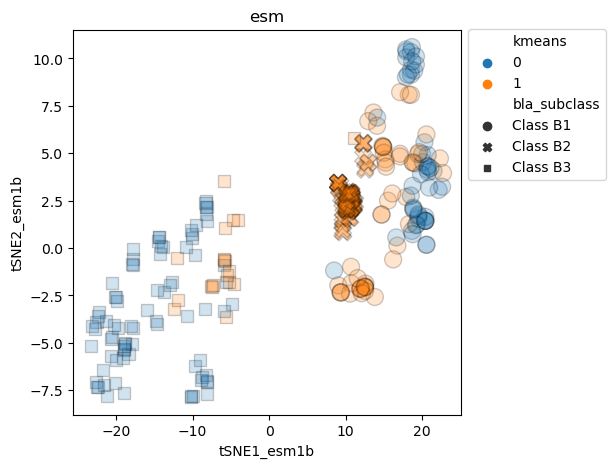

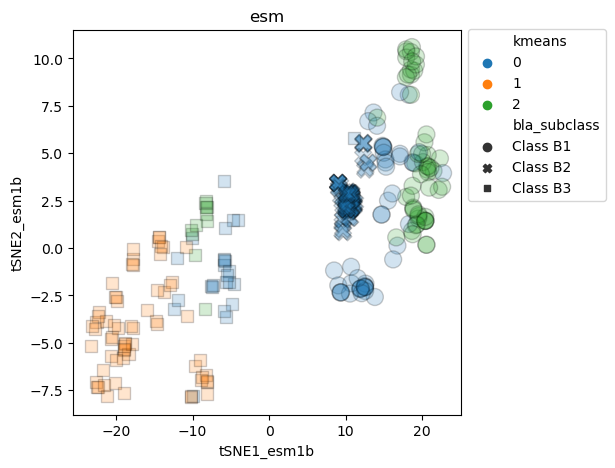

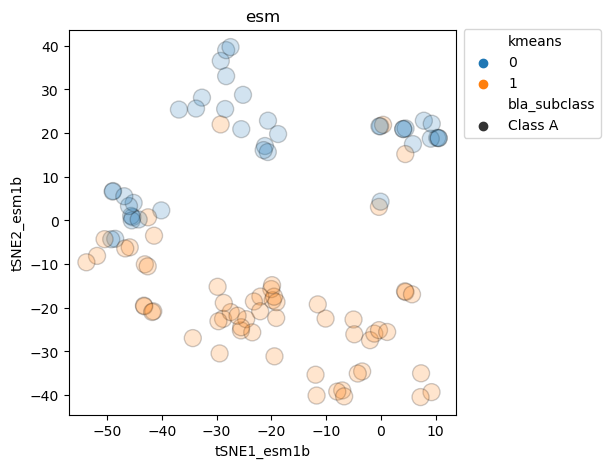

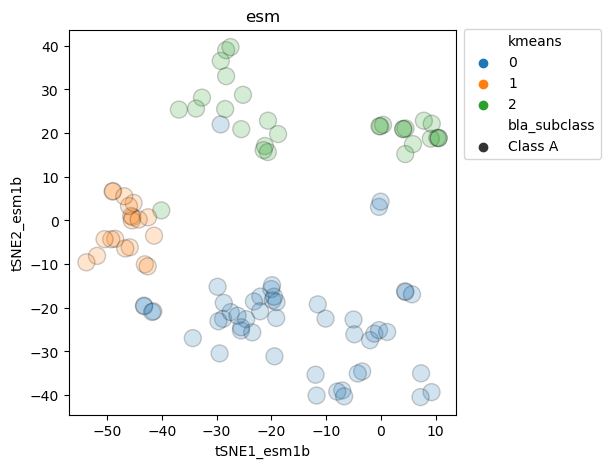

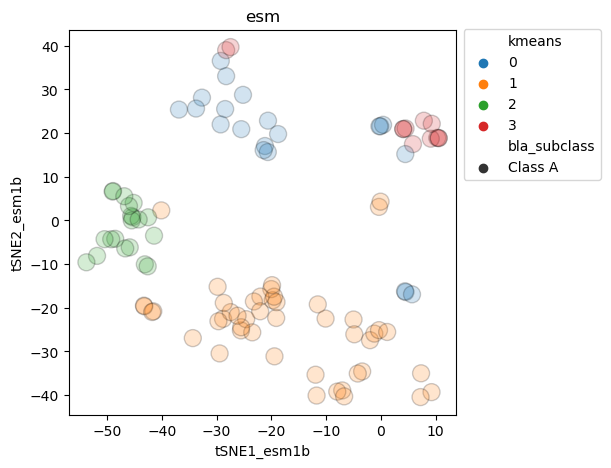

In [10]:
for n in [2, 3]:
    do_kmeans(rand100_sbl, "esm", n)

for n in [2, 3]:
    do_kmeans(rand100_mbl, "esm", n)

for n in [2, 3, 4]:
    do_kmeans(rand100_a, "esm", n)

## aa_composition

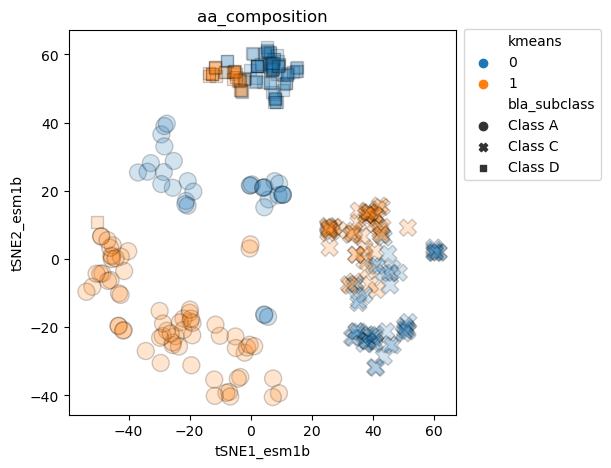

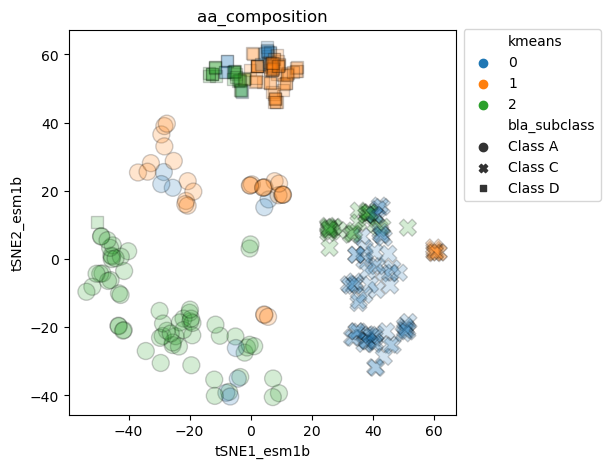

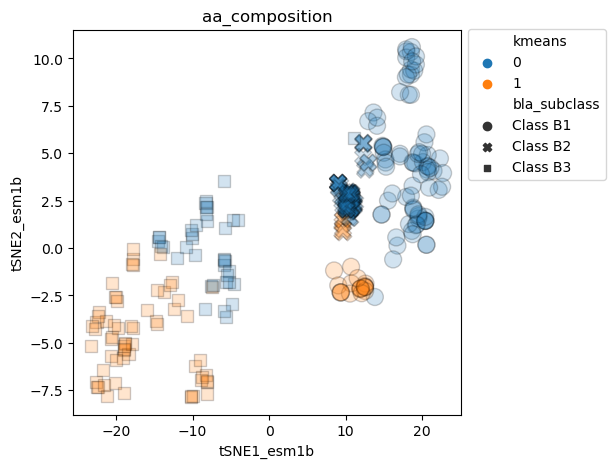

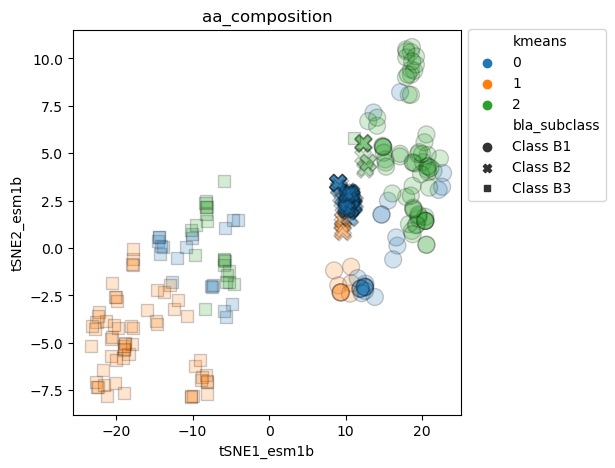

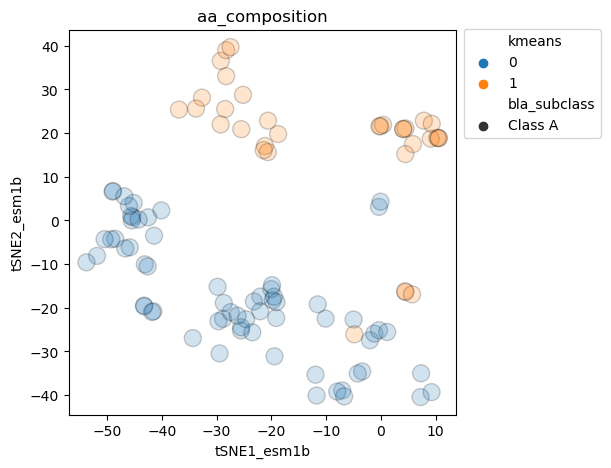

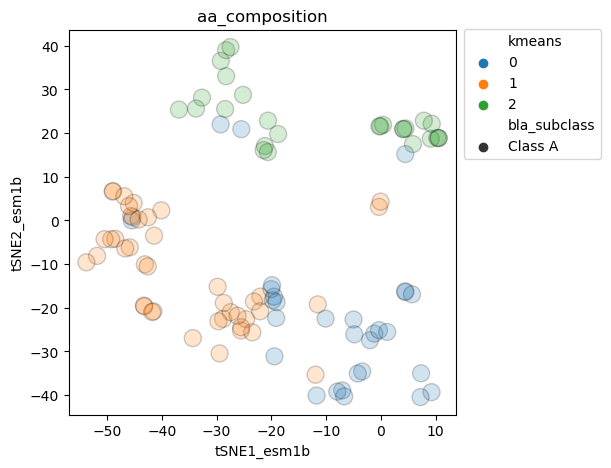

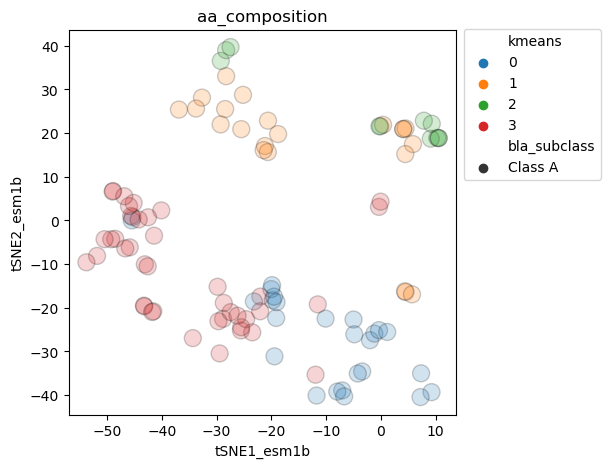

In [11]:
for n in [2, 3]:
    do_kmeans(rand100_sbl, "aa_composition", n)

for n in [2, 3]:
    do_kmeans(rand100_mbl, "aa_composition", n)

for n in [2, 3, 4]:
    do_kmeans(rand100_a, "aa_composition", n)

## carp640M

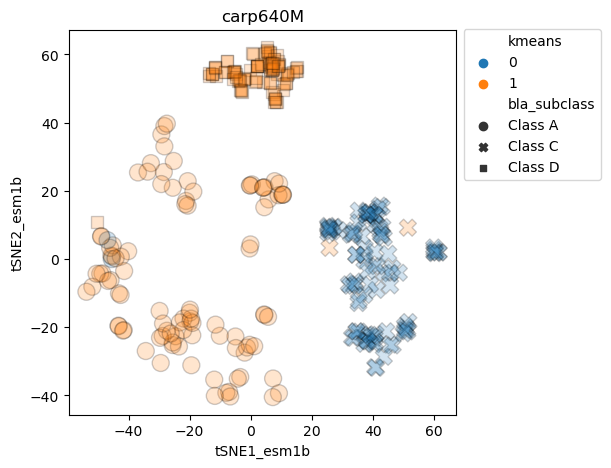

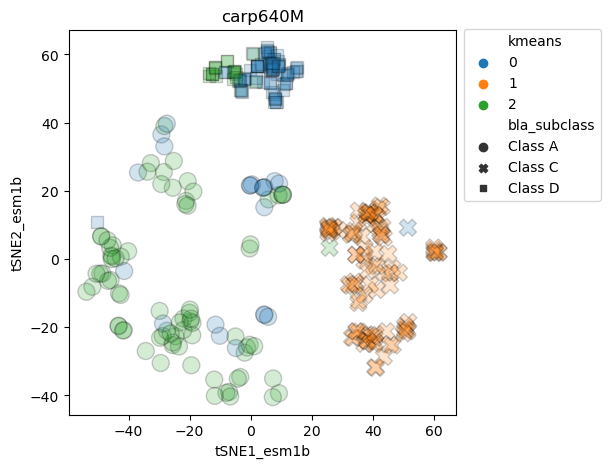

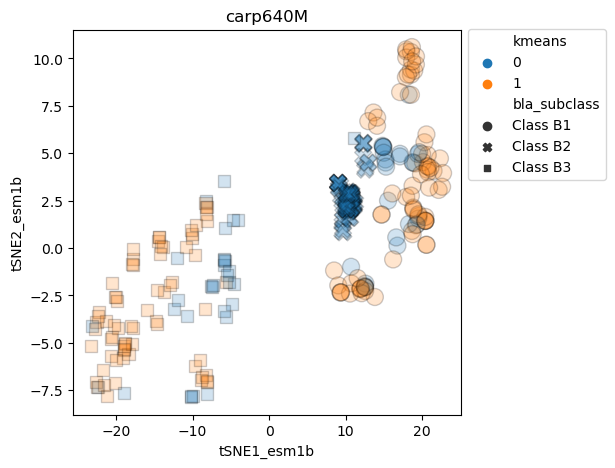

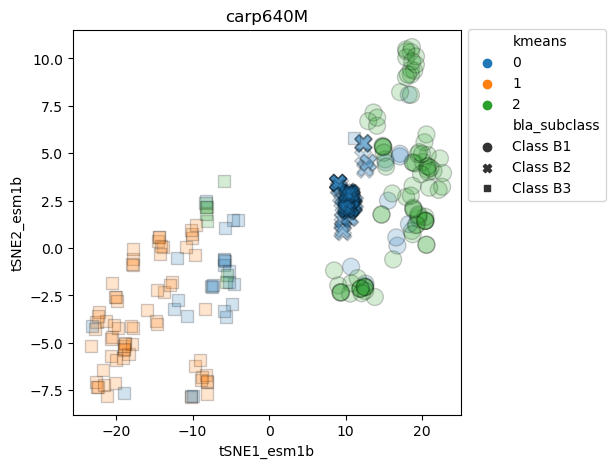

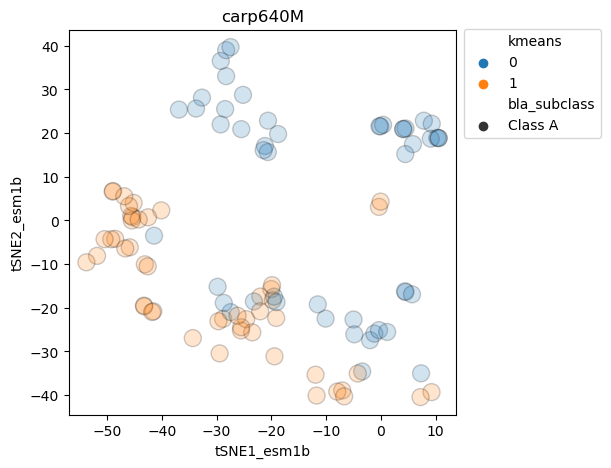

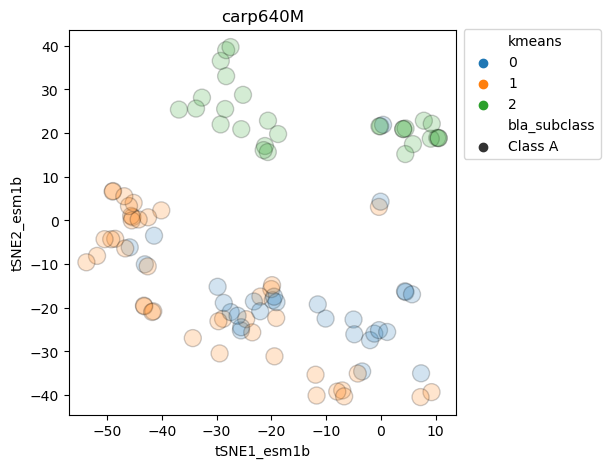

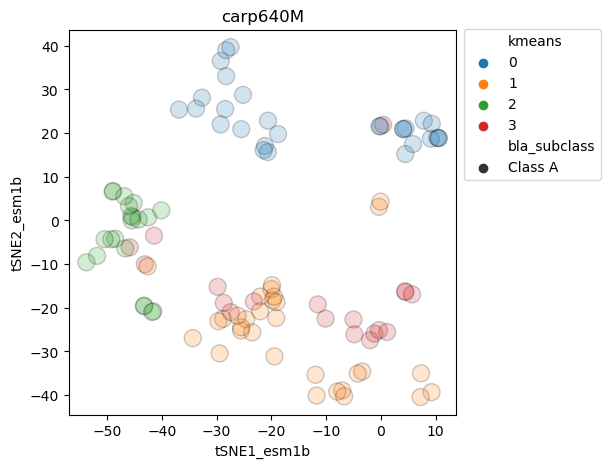

In [12]:
for n in [2, 3]:
    do_kmeans(rand100_sbl, "carp640M", n)

for n in [2, 3]:
    do_kmeans(rand100_mbl, "carp640M", n)

for n in [2, 3, 4]:
    do_kmeans(rand100_a, "carp640M", n)

## t5XLU850

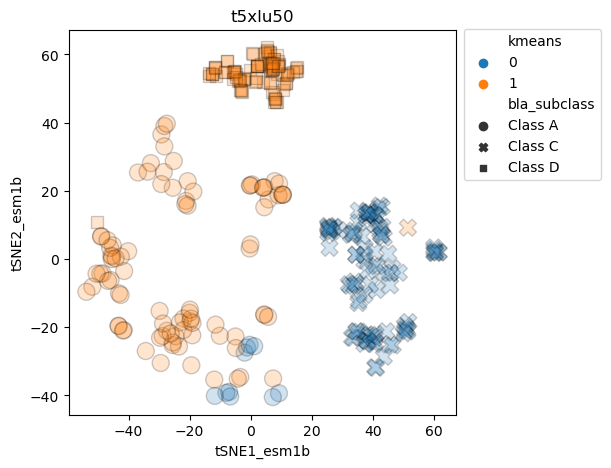

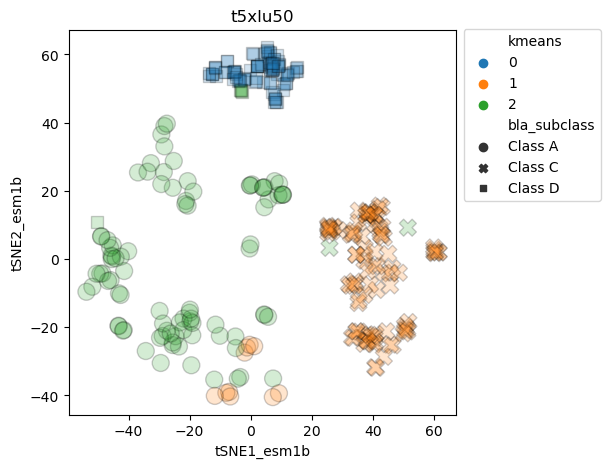

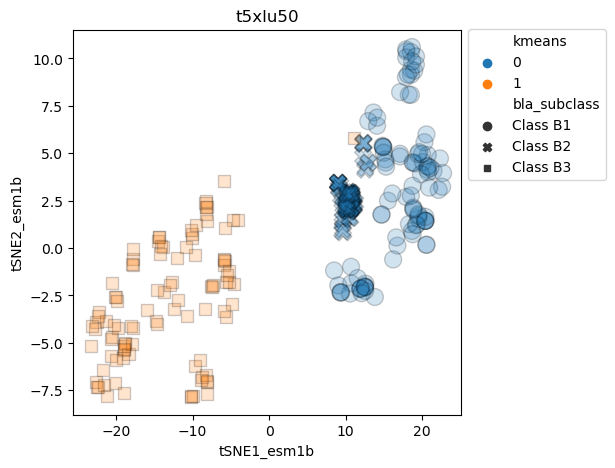

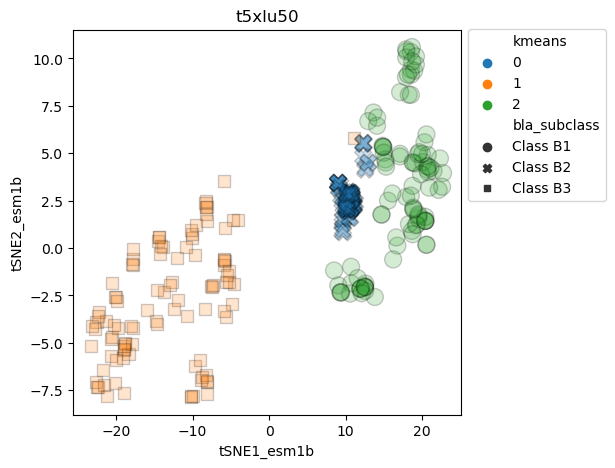

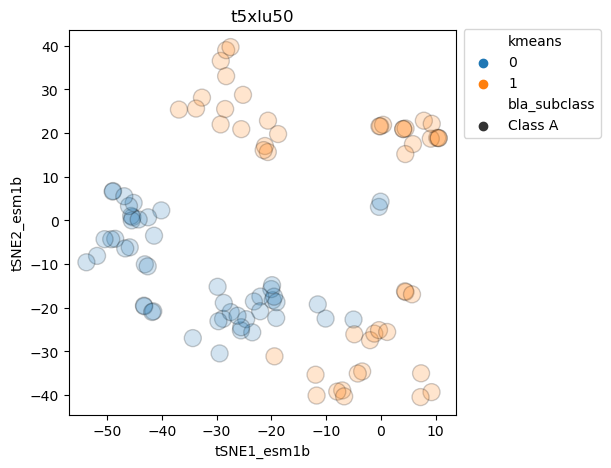

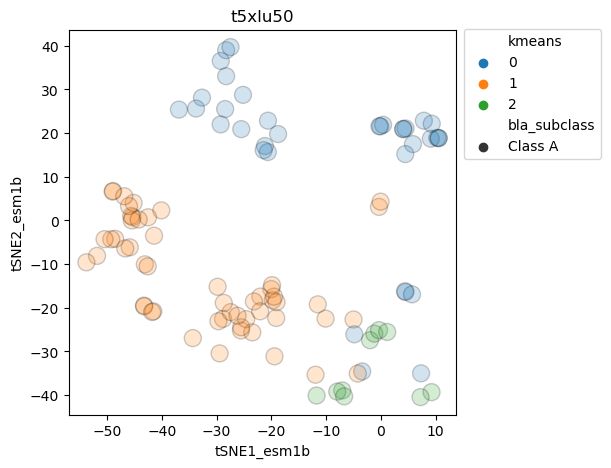

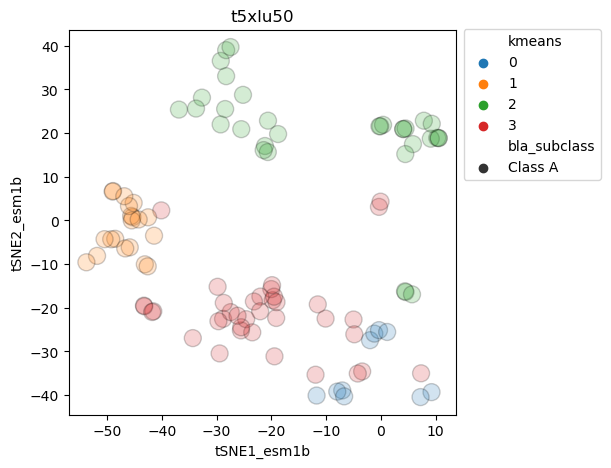

In [13]:
for n in [2, 3]:
    do_kmeans(rand100_sbl, "t5xlu50", n)

for n in [2, 3]:
    do_kmeans(rand100_mbl, "t5xlu50", n)

for n in [2, 3, 4]:
    do_kmeans(rand100_a, "t5xlu50", n)

## t5bfd

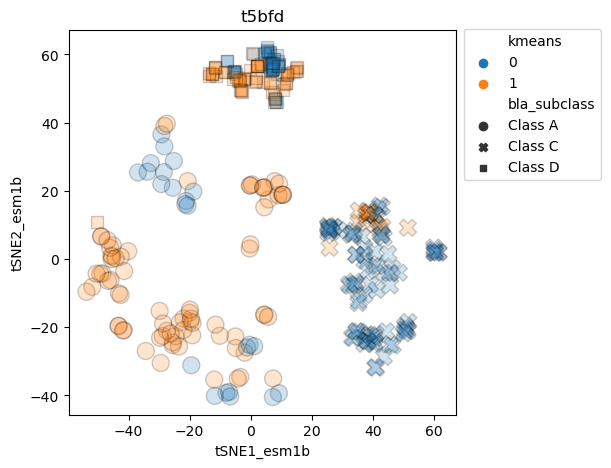

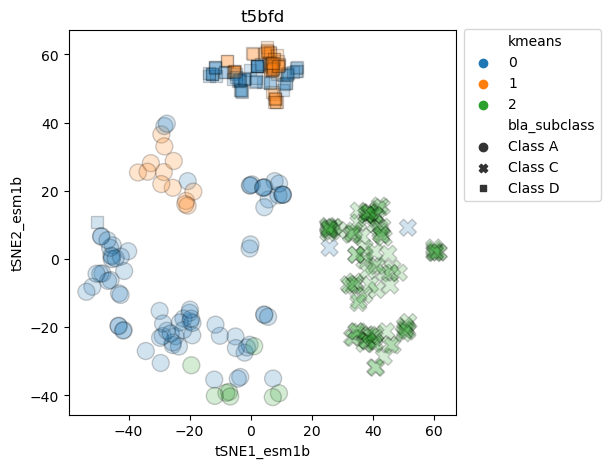

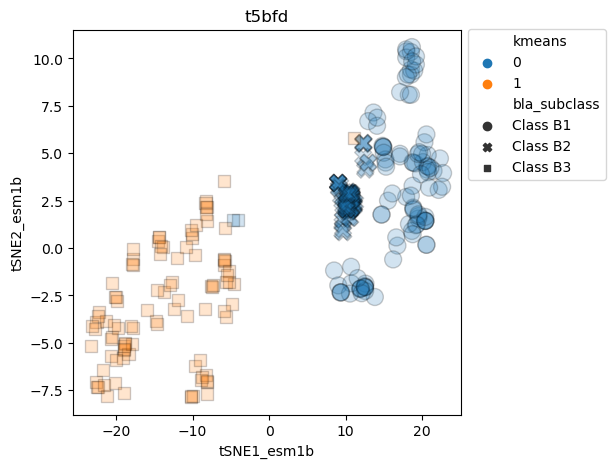

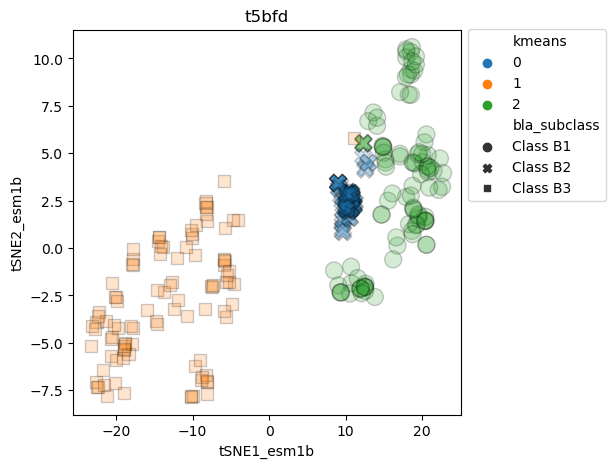

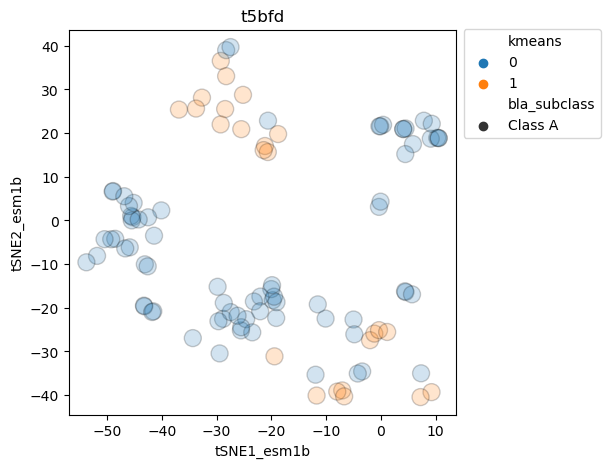

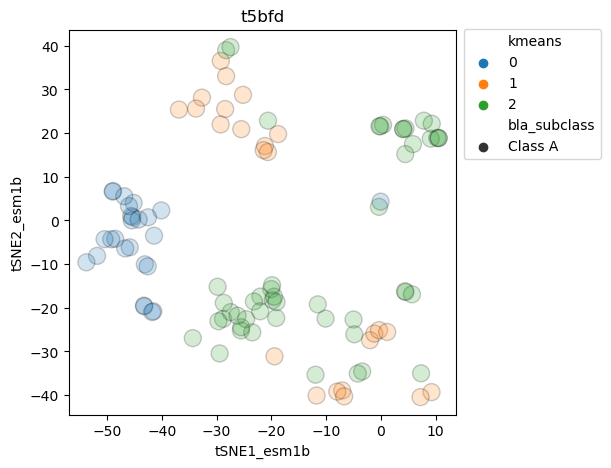

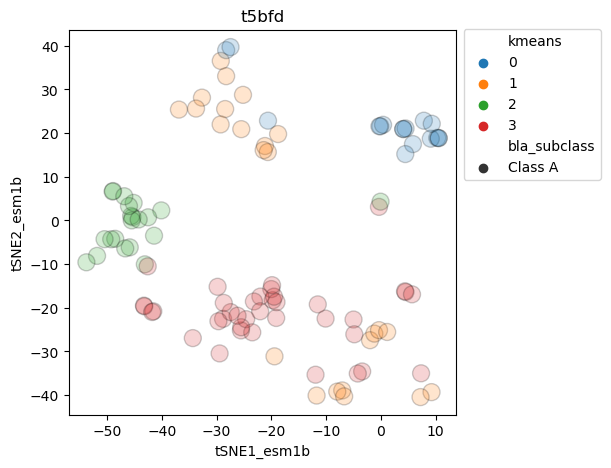

In [14]:
for n in [2, 3]:
    do_kmeans(rand100_sbl, "t5bfd", n)

for n in [2, 3]:
    do_kmeans(rand100_mbl, "t5bfd", n)

for n in [2, 3, 4]:
    do_kmeans(rand100_a, "t5bfd", n)

## xlnet

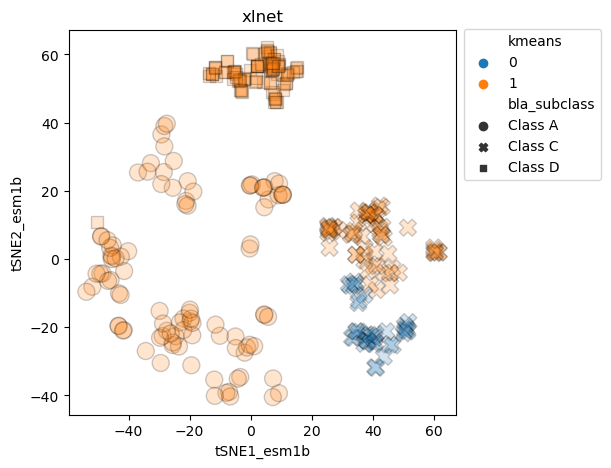

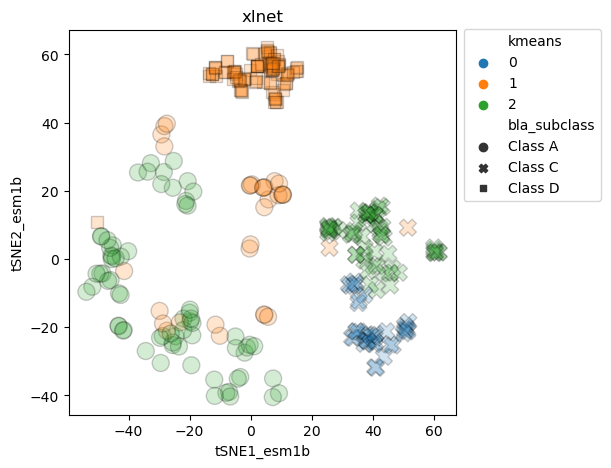

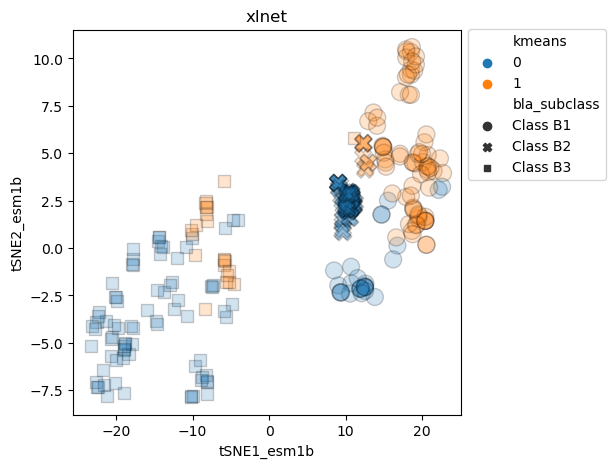

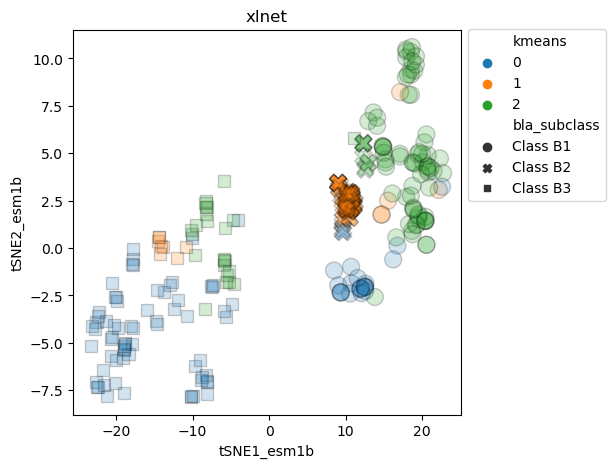

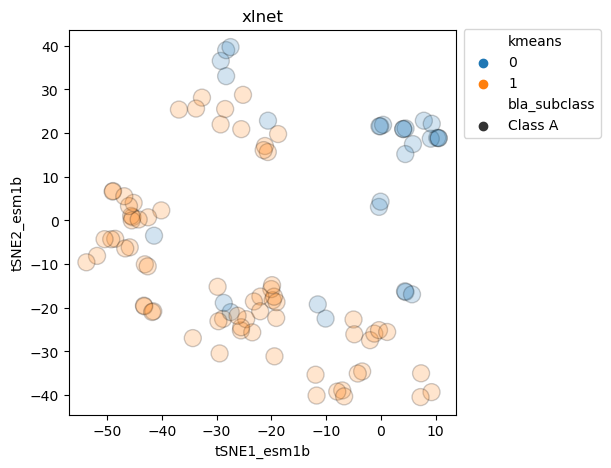

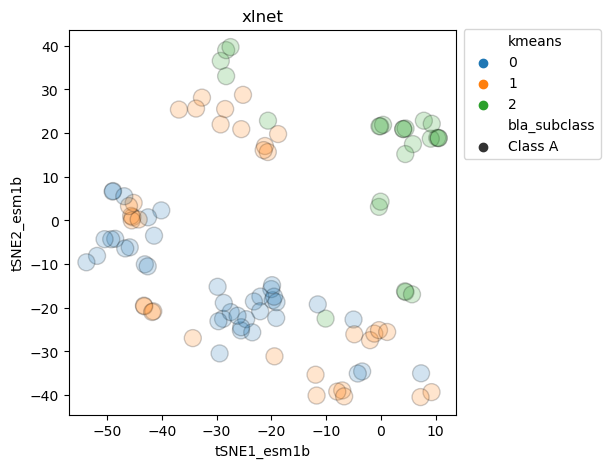

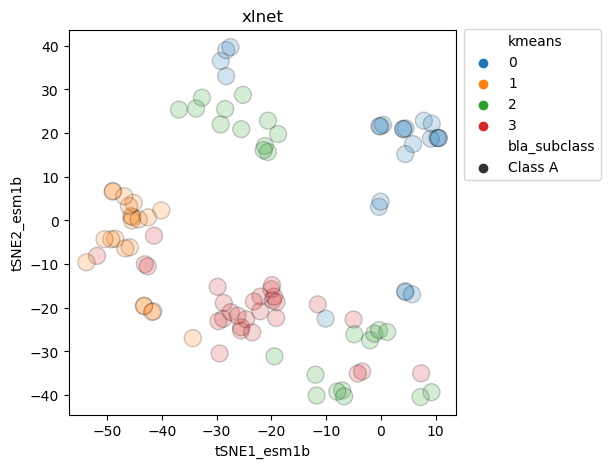

In [15]:
for n in [2, 3]:
    do_kmeans(rand100_sbl, "xlnet", n)

for n in [2, 3]:
    do_kmeans(rand100_mbl, "xlnet", n)

for n in [2, 3, 4]:
    do_kmeans(rand100_a, "xlnet", n)

## bepler

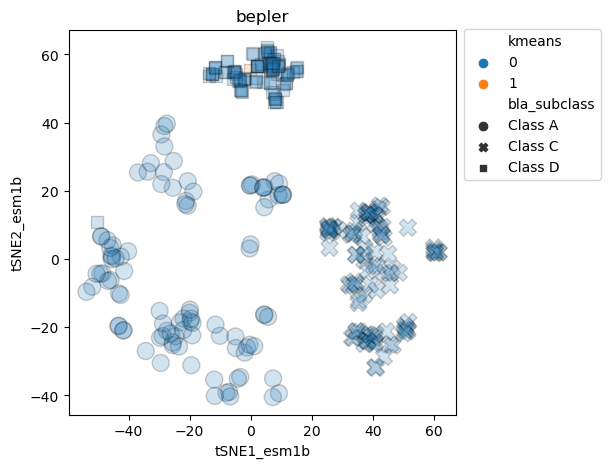

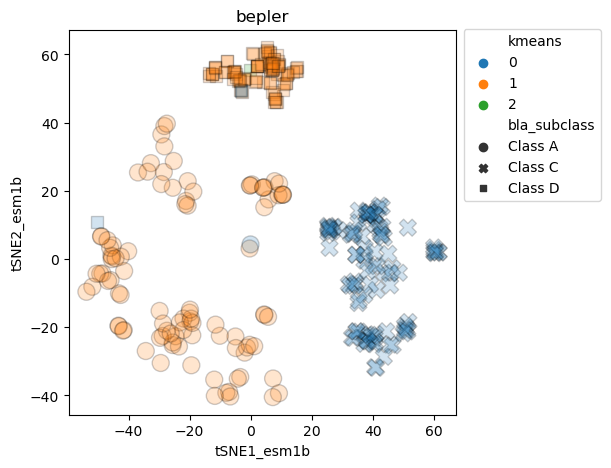

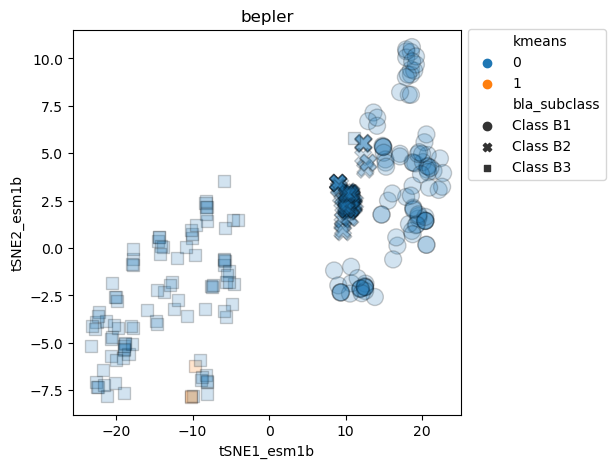

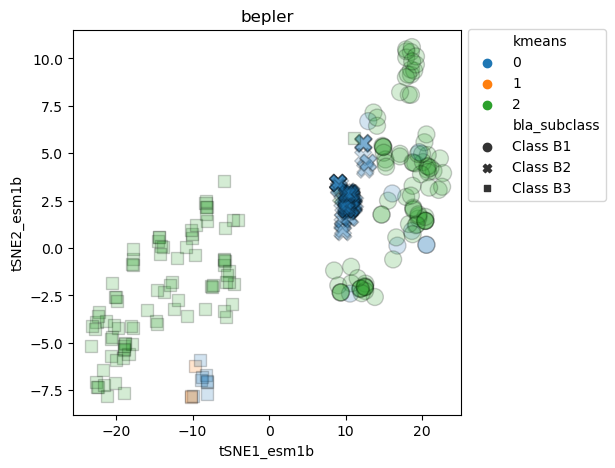

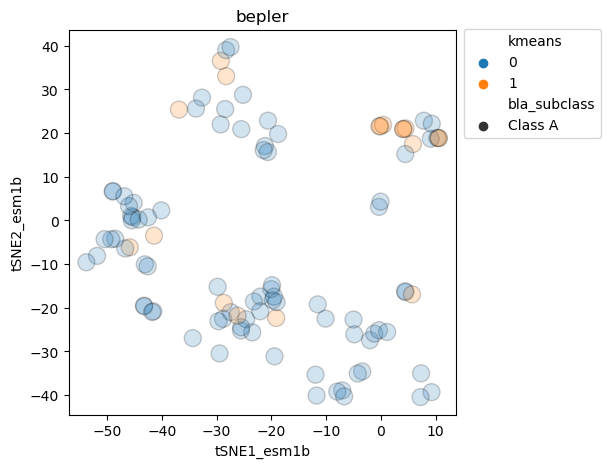

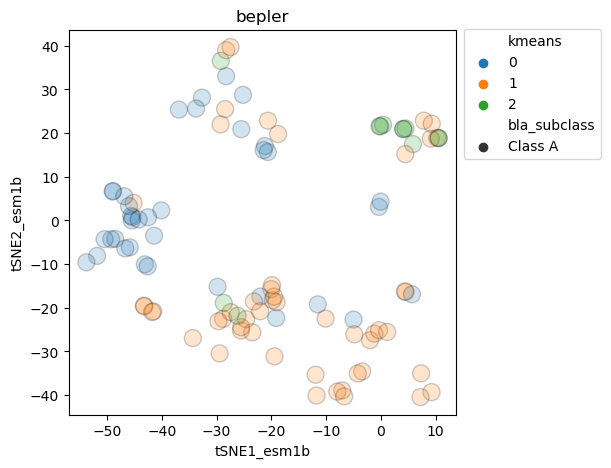

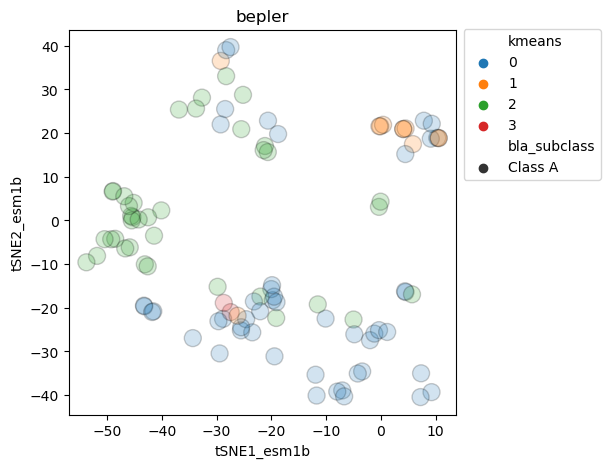

In [17]:
for n in [2, 3]:
    do_kmeans(rand100_sbl, "bepler", n)

for n in [2, 3]:
    do_kmeans(rand100_mbl, "bepler", n)

for n in [2, 3, 4]:
    do_kmeans(rand100_a, "bepler", n)

Fin